In [1]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':13})
from functools import partial
import jax
from veris.growth import Growth
from initialize_growth import vs, sett

In [2]:
# thermodynamics component of veris
@partial(jax.jit, static_argnames=['sett'])
def run_growth(vs, sett):
    
    (
        vs.hIceMean,
        vs.hSnowMean,
        vs.Area,
        vs.TSurf,
        vs.EmPmR,
        _, #vs.forc_salt_surface,
        vs.Qsw,
        vs.Qnet,
        vs.SeaIceLoad,
        vs.IcePenetSW,
        vs.recip_hIceMean,
    ) = Growth(vs, sett)

    return vs

In [3]:
ice = []
for n_timesteps in range(150):
    ice += vs.hIceMean[0,0],
    vs = run_growth(vs, sett)

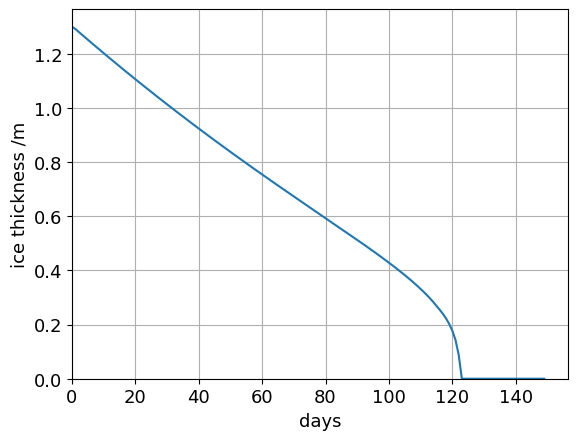

In [4]:
plt.plot(ice)
plt.xlim([0,None])
plt.ylim([0,None])
plt.xlabel('days')
plt.ylabel('ice thickness /m')
plt.grid()